In [2]:
# !pip install ipywidgets

# [YOLOv8](https://docs.ultralytics.com/)

## 설치

- 파이토치를 먼저 설치
- `pip install ultralytics`
- 주피터노트북에서 실행할 경우 프로그래스바를 실행하기 위해서 다음을 설치한다. (필수는 아님)
    - `pip install ipywidgets` or `conda install -y -c conda-forge ipywidgets`

## 실행 방법
- CLI (command line interface)에서 터미널 명령어로 추론/평가/학습을 진행할 수 있다.
    - 모델이 처리한 결과를 최종결과로 사용할 경우 이 방법으로 처리한다.
- Python lib 를 이용해 코드상에 원하는 추론/평가/학습을 진행할 수 있다.
    - 모델이 처리한 결과를 받아서 추가 작업이 필요한 경우 이 방법으로 처리한다.

# CLI 기본 명령어 구조

- 구문
    - <span style='font-size:1.3em'>**yolo**  **task**=detect|classify|segment|pose  **mode**=train|val|predict  **model**=yolov8n.yaml|yolov8n.pt|..  **args**</span>
    - <b style='font-size:1.2em'>task:</b> \[detect, classify, segment, pose\] 중 하나를 지정한다. \[optional\]로 생략하면 모델을 보고 추측해서 task를 정한다.
        - **detect:** Object detection
        - **classify:** Image classification
        - **segment:** Instance segmentation
        - **pose:** pose estimation
    - <b style='font-size:1.2em'>mode:</b> \[train, val, predict, export\] 중 하나를 지정한다. \[필수\]로 입력해야 한다.
        - **train:** custom dataset을 train 시킨다.
        - **val:** 모델 성능을 평가한다.
        - **predict:** 입력 이미지에 대한 추론을 한다.
        - **export:** 모델을 다른 형식으로 변환한다.
    - <b style='font-size:1.2em'>model:</b> **pretrained 모델**이나 **모델 설정 yaml 파일**의 경로를 설정한다. \[필수\]로 입력해야 한다.
        - pretrained 모델 파일경로
            - task에 맞는 pretrained 모델파일의 저장 경로를 지정한다.
            - transfer learnging을 하거나 fine tuning 시 방법
        - 모델 구조 설정 yaml 파일 경로
            - task에 맞는 pretrained 모델 설정파일(yaml파일)의 경로를 지정한다.
            - train mode에서 지정하며 모델을 새로 생성해서 처음부터 학습 시킬 경우 지정한다.
        - Ultralytics에서 제공하는 Pretrained 모델
            - 모델 크기에 따라 5개의 모델을 제공하며 큰 모델은 작은 모델에 비해 추론 성능이 좋은대신 속도는 느리다.
            - 모델은 처음 추론또는 학습할때 local 컴퓨터에 없으면 download 받는다.
            - https://github.com/ultralytics/ultralytics#models
            - ### 제공 모델
            
            | **task\\모델크기**  | **nano**   | **small** | **medium** | **large** | **xlarge** |
            |:--------------------|------------|-------------|------------|-----------|----------|
            | **object detection**| yolov8n    | yolov8s     | yolov8m    | yolov8l   | yolov8x    |
            | **segmentation**   | yolov8n-seg  | yolov8s-seg     | yolov8m-seg    | yolov8l-seg   | yolov8x-seg    |
            | **classification** | yolov8n-cls  | yolov8s-cls     | yolov8m-cls    | yolov8l-cls   | yolov8x-cls    |  
            | **pose estimation** | yolov8n-pose  | yolov8s-pose     | yolov8m-pose    | yolov8l-pose   | yolov8x-pose    | 
            
            
            - 확장자가 `pt`이면 pretrained 된 모델을, `yaml`이면 모델 구조 설정파일을 download하여 실행한다.
                - pretrained model은 fine tuning이나 추론할 때, yaml설정파일은 처음부터 학습할 경우 설정하여 받는다.
    - <b style='font-size:1.2em'>args:</b> task와 mode과 관련한 추가 설정값들을 지정한다.
        - https://docs.ultralytics.com/cfg/

# [Object Detection](https://docs.ultralytics.com/tasks/detection/)

##  Predict (추론)

### 모델로딩
- Ultralytics에서 제공하는 Pretrained Model이나 직접 학습시킨 모델을 이용해 추론한다.
- Ultralytics는 Object Detection을 위한 [Pretrained 모델](#제공-모델)을 제공한다.
    - Object Detection 모델은 COCO dataset으로 학습되었다.
    - 모델 명을 지정하면 자동으로 다운로드를 받는다.

### CLI
`yolo task=detect mode=predict model=model_path source=추론할_image_path`
- 추가 설정 (configuration)
    - https://docs.ultralytics.com/usage/cfg/#predict
    

> - argument 설정은 `name=value` 형식으로 한다. (`--name value`나 `name value` 는 안된다.)

> ### 추론 할 Source 타입
> - https://docs.ultralytics.com/modes/predict/#inference-sources
> - **Image:** 이미지파일경로, URL, PIL.Image, np.ndarray, torch.Tensor
> - **동영상:** 동영상파일경로, 웹캠 ID, 유튜브 URL
> - **여러개의 영상처리:** 디렉토리 경로 또는 경로들을 원소로 가지는 리스트.

In [3]:
# 추론
!yolo  task=detect  mode=predict  model=models/yolov8n.pt  source=01_test_image_detection/1.jpg

Ultralytics YOLOv8.2.23 �윓� Python-3.11.8 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\1.jpg: 480x640 6 persons, 2 bicycles, 5 cars, 2 motorcycles, 1 bus, 3 traffic lights, 1 dog, 1 handbag, 69.7ms
Speed: 2.0ms preprocess, 69.7ms inference, 731.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Classes\DA-35\runs\detect\predict
�윊� Learn more at https://docs.ultralytics.com/modes/predict



  0%|          | 0.00/6.23M [00:00<?, ?B/s]
100%|##########| 6.23M/6.23M [00:00<00:00, 118MB/s]


In [4]:
# save_txt=True : 찾은 결과를 text에도 저장.
#  runs/task/mode    runs/detect/predict/.....
!yolo  task=detect  mode=predict  model=models/yolov8n.pt  source=01_test_image_detection/1.jpg  save_txt=True

Ultralytics YOLOv8.2.23 �윓� Python-3.11.8 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\1.jpg: 480x640 6 persons, 2 bicycles, 5 cars, 2 motorcycles, 1 bus, 3 traffic lights, 1 dog, 1 handbag, 58.0ms
Speed: 2.0ms preprocess, 58.0ms inference, 458.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Classes\DA-35\runs\detect\predict2
1 label saved to C:\Classes\DA-35\runs\detect\predict2\labels
�윊� Learn more at https://docs.ultralytics.com/modes/predict


In [5]:
# conf=0.7   #confidence score threshold지정. (0.7 이상만 나오도록 한다.)
!yolo  task=detect  mode=predict  model=models/yolov8n.pt  source=01_test_image_detection/1.jpg  conf=0.7

Ultralytics YOLOv8.2.23 �윓� Python-3.11.8 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\1.jpg: 480x640 3 persons, 1 car, 1 bus, 62.1ms
Speed: 2.0ms preprocess, 62.1ms inference, 459.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Classes\DA-35\runs\detect\predict3
�윊� Learn more at https://docs.ultralytics.com/modes/predict


In [7]:
# source=0  실시간 디텍션. (카메라 id) show=True
!yolo  task=detect  mode=predict  model=models/yolov8n.pt  source=0 show=True

Ultralytics YOLOv8.2.23 �윓� Python-3.11.8 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs



[ WARN:0@9.194] global cap_msmf.cpp:475 `anonymous-namespace'::SourceReaderCB::OnReadSample videoio(MSMF): OnReadSample() is called with error status: -1072875772
[ WARN:0@9.194] global cap_msmf.cpp:487 `anonymous-namespace'::SourceReaderCB::OnReadSample videoio(MSMF): async ReadSample() call is failed with error status: -1072875772
[ WARN:1@9.194] global cap_msmf.cpp:1768 CvCapture_MSMF::grabFrame videoio(MSMF): can't grab frame. Error: -1072875772
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Classes\DA-35\09_vision_deeplearning\env\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Classes\DA-35\09_vision_deeplearning\env\Lib\site-packages\ultralytics\cfg\__init__.py", line 583, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Classes\DA-35\09_vision_deeplearning\env\Lib\site-packages\ultral

### Python

In [23]:
result = model(
    # "https://cdn.huffingtonpost.kr/news/photo/201911/90011_169154.jpeg",
    "https://img.khan.co.kr/news/2009/10/22/20091023.01100122000001.02L.webp",
    save=True
)

100%|██████████████████████████████████████████| 34.6k/34.6k [00:00<00:00, 33.8MB/s]


image 1/1 c:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\20091023.01100122000001.02L.webp: 448x640 2 persons, 1 cell phone, 85.2ms
Speed: 1.0ms preprocess, 85.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to C:\Classes\DA-35\runs\detect\predict13
211 labels saved to C:\Classes\DA-35\runs\detect\predict13\labels


### 한번에 여러장 추론
- 추론한 이미지들이 **같은 경로(Path)에** 있을 경우 **그 디렉토리의 경로를 문자열로 전달한다.**
- **wild card 문자** 를 이용해 특정 확장자의 파일이나 특정 문자열을 포함한 파일들을 추론할 수있다.
    - \*: 파일명에 지정하며 n 글자를 표현한다.
    - \*\*: 디렉토리에 지정하면 모든 하위 디렉토리를 표현한다.
- 추론할 이미지들이 **서로 다른 경로에** 있을 경우 **리스트에 경로들을 모아서 전달한다.**

In [2]:
# 다른 경로의 이미지들을 추정 -> 리스트에 담아서 전달.
img_path = ['90011_169154.jpeg', "01_test_image_detection/5.jpg"]  
model = YOLO('models/yolov8l.pt')
result = model(
    img_path, save=True
)


0: 640x640 1 dog, 469.7ms
1: 640x640 7 persons, 1 tie, 1 bottle, 15 wine glasss, 2 cups, 3 forks, 2 knifes, 1 bowl, 2 dining tables, 1 vase, 469.7ms
Speed: 3.0ms preprocess, 469.7ms inference, 260.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Classes\DA-35\runs\detect\predict5


## 동영상
- source에 동영상 파일 경로를 지정한다.
    - frame 단위로 추론한다.

In [28]:
mov_path = "01_test_image_detection/indo_street.mp4"
model = YOLO('models/yolov8n.pt')
model(mov_path, save=True, show=True)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/350) c:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\indo_street.mp4: 384x640 10 persons, 1 bench, 1 umbrella, 50.7ms
video 1/1 (frame 2/350) c:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\indo_street.mp4: 384x640 10 persons, 1 bench, 2 umbrellas, 45.9ms
video 1/1 (frame 3/350) c:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_i

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## 추론결과

### ultralytics.yolo.engine.results.Results
- 모델의 추론 결과는 list에 이미지별 예측결과를 Results에 담아 반환한다.
- **Results** : 한개 이미지에 대한 추론결과를 담는 객체
- 추론 종류에 따라 다음 속성을 이용해 결과를 조회한다.
    - Detection: **`result.boxes`** - Boxes type
    - Segmentation: **`result.masks`** - Masks type
    - Classification: **`result.probs`** - Probs type
    - Pose estimator: **`result.keypoints`** - Keypoints  type
- **Boxes, Masks, Keypoints 는 모두 iteratble 타입으로 for in 문으로 찾은 개별 물체에 대한 결과를 같은 타입의 instance로 조회할 수 있다.**    
- 추가 정보
    - **Results.orig_img:** 추론한 원본 이미지
    - **Results.orig_shape:** 추론한 원본 이미지의 크기 (height, width)
    - **Results.path:** 추론한 원본이미지의 경로
    - **Results.names:** class2classname 정의한 딕셔너리 (key: 클래스, name: 클래스 이름)
- 메소드
    - **Results.plot()**
        - 원본 이미지에 추론한 결과를 표시한 이미지를 반환한다.
        - OpenCV를 이용해 처리한 이미지가 반환되어 **BGR 색모드의 ndarray로 반환** 한다.

In [5]:
from ultralytics import YOLO
model = YOLO("models/yolov8l.pt")
results = model("01_test_image_detection/1.jpg", save=True, conf=0.6)


image 1/1 c:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\1.jpg: 480x640 4 persons, 3 cars, 1 motorcycle, 1 bus, 1 dog, 1 backpack, 1 handbag, 371.1ms
Speed: 2.0ms preprocess, 371.1ms inference, 378.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Classes\DA-35\runs\detect\predict15


In [6]:
result = results[0]

In [11]:
print("원본이미지 size:", result.orig_shape) 
print("원본이미지 경로: ", result.path)
print("원본이미지:", result.orig_img.shape)

원본이미지 size: (480, 640)
원본이미지 경로:  c:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\1.jpg
원본이미지: (480, 640, 3)


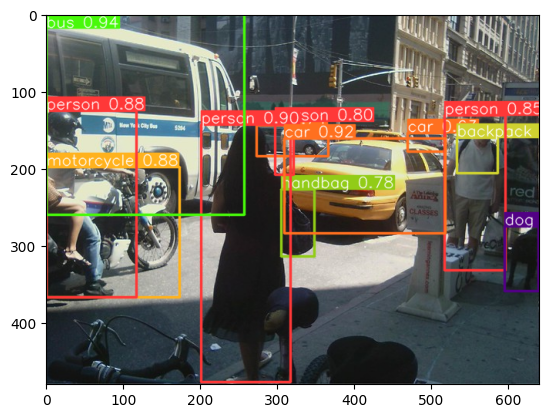

In [14]:
# 결과확인
import matplotlib.pyplot as plt
plt.imshow(result.plot()[:,:,::-1]); # BGR 모드 (yolo는 opencv를 이용해 image를 loading함.)
plt.show()

### Object Detection 결과값 조회

- ultralytics.yolo.engine.results.**Boxes**에 추론 결과를 담아 반환
    - Results.boxes로 조회
- 주요 속성
    - shape: 결과 shape. (찾은 물체개수, 6)
    - boxes
        - 6: 좌상단 x, 좌상단 y, 우하단 x, 우하단 y, confidence score, label
    - xyxy
        - bounding box의 `좌상단 x, 좌상단 y, 우하단 x, 우하단 y` 좌표 반환
    - xyxyn
        - xyxy를 이미지 대비 비율로 반환
    - xywh
        - bounding box의 `center x, center y, 너비, 높이` 를 반환
    - xywhn
        - xywh를 이미지 대비 비율로 반환
    - cls: 찾은 물체의 label
    - conf: cls에 대한 confidence score (그 물체일 확률)




> - 0차원 torch.Tensor 를 상수로 변환
>     - `tensor.item()`
> - N차원 torch.Tensor를 ndarray로 변환
>     - `tensor.numpy()`
>     - Tensor객체가 GPU메모리에 있을 경우 메인메모리(CPU)로 먼저 옮겨야 한다.
>         - `tensor.to('cpu')` or `tensor.cpu()`

In [27]:
# type(result)
boxes = result.boxes  # Object Detection 결과
print(type(boxes))

<class 'ultralytics.engine.results.Boxes'>


In [28]:
boxes.shape # detection 결과 shape
# [12, 6]  #12:찾은 object개수,   6: 개별 object의 조회결과.
#   (x1, y,1 x2, y2, class_index, conf score) - x1,y1: bbox 좌상단좌표, x2,y2:bbox 우하단좌표

torch.Size([12, 6])

In [30]:
##### 찾은 물체의 class (index) : boxes.cls
print(boxes.cls.shape)
boxes.cls

torch.Size([12])


tensor([ 5.,  2.,  0.,  0.,  3., 16.,  0.,  0., 26.,  2., 24.,  2.])

In [49]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [36]:
##### 찾은 object 의 대한 확률
print(boxes.conf.shape)
boxes.conf

torch.Size([12])


tensor([0.9438, 0.9237, 0.8970, 0.8784, 0.8758, 0.8611, 0.8547, 0.8031, 0.7822, 0.7428, 0.6926, 0.6258])

In [38]:
##### bbox 좌표
boxes.xyxy.shape  # 좌상단/우하단 x,y 좌표. 
boxes.xyxy

tensor([[4.6646e-01, 1.9818e-01, 2.5706e+02, 2.6015e+02],
        [3.0953e+02, 1.6109e+02, 5.1875e+02, 2.8411e+02],
        [2.0100e+02, 1.4335e+02, 3.1724e+02, 4.7752e+02],
        [9.5421e-02, 1.2562e+02, 1.1768e+02, 3.6709e+02],
        [9.9731e-02, 1.9845e+02, 1.7311e+02, 3.6780e+02],
        [5.9564e+02, 2.7594e+02, 6.3976e+02, 3.5946e+02],
        [5.1743e+02, 1.3108e+02, 5.9609e+02, 3.3246e+02],
        [2.9758e+02, 1.3948e+02, 3.2179e+02, 2.0845e+02],
        [3.0523e+02, 2.2754e+02, 3.4836e+02, 3.1424e+02],
        [2.7380e+02, 1.4439e+02, 3.6607e+02, 1.8445e+02],
        [5.3325e+02, 1.6007e+02, 5.8630e+02, 2.0684e+02],
        [4.6987e+02, 1.5420e+02, 5.1870e+02, 1.7898e+02]])

In [39]:
boxes.xyxyn  # 좌상단/우하단 xy 좌표 -> 이미지 width/height 대비 비율 (0 ~ 1)

tensor([[7.2885e-04, 4.1288e-04, 4.0166e-01, 5.4198e-01],
        [4.8365e-01, 3.3561e-01, 8.1055e-01, 5.9189e-01],
        [3.1406e-01, 2.9865e-01, 4.9569e-01, 9.9483e-01],
        [1.4910e-04, 2.6172e-01, 1.8388e-01, 7.6478e-01],
        [1.5583e-04, 4.1343e-01, 2.7048e-01, 7.6624e-01],
        [9.3068e-01, 5.7487e-01, 9.9963e-01, 7.4888e-01],
        [8.0849e-01, 2.7309e-01, 9.3139e-01, 6.9263e-01],
        [4.6497e-01, 2.9059e-01, 5.0279e-01, 4.3427e-01],
        [4.7692e-01, 4.7403e-01, 5.4432e-01, 6.5468e-01],
        [4.2781e-01, 3.0081e-01, 5.7199e-01, 3.8427e-01],
        [8.3320e-01, 3.3347e-01, 9.1610e-01, 4.3092e-01],
        [7.3417e-01, 3.2126e-01, 8.1047e-01, 3.7287e-01]])

In [40]:
boxes.xywh   # center x,y 좌표, bbox width, height 길이

tensor([[128.7646, 130.1733, 256.5962, 259.9502],
        [414.1440, 222.5999, 209.2208, 123.0164],
        [259.1207, 310.4354, 116.2384, 334.1682],
        [ 58.8902, 246.3587, 117.5895, 241.4686],
        [ 86.6034, 283.1222, 173.0073, 169.3469],
        [617.6990, 317.7001,  44.1221,  83.5267],
        [556.7607, 231.7745,  78.6555, 201.3804],
        [309.6834, 173.9674,  24.2081,  68.9690],
        [326.7969, 270.8900,  43.1355,  86.7098],
        [319.9351, 164.4189,  92.2760,  40.0593],
        [559.7767, 183.4541,  53.0511,  46.7738],
        [494.2835, 166.5904,  48.8317,  24.7733]])

In [42]:
boxes.xywhn  # 이미지 size 대비 비율. 

tensor([[0.2012, 0.2712, 0.4009, 0.5416],
        [0.6471, 0.4637, 0.3269, 0.2563],
        [0.4049, 0.6467, 0.1816, 0.6962],
        [0.0920, 0.5132, 0.1837, 0.5031],
        [0.1353, 0.5898, 0.2703, 0.3528],
        [0.9652, 0.6619, 0.0689, 0.1740],
        [0.8699, 0.4829, 0.1229, 0.4195],
        [0.4839, 0.3624, 0.0378, 0.1437],
        [0.5106, 0.5644, 0.0674, 0.1806],
        [0.4999, 0.3425, 0.1442, 0.0835],
        [0.8747, 0.3822, 0.0829, 0.0974],
        [0.7723, 0.3471, 0.0763, 0.0516]])

In [47]:
for cls, conf, xyxy in zip(boxes.cls, boxes.conf, boxes.xyxy):
    print(int(cls.item()), conf.item(), xyxy, sep=" , ")

5 , 0.9438429474830627 , tensor([4.6646e-01, 1.9818e-01, 2.5706e+02, 2.6015e+02])
2 , 0.9237076640129089 , tensor([309.5336, 161.0917, 518.7545, 284.1081])
0 , 0.8970103859901428 , tensor([201.0015, 143.3513, 317.2399, 477.5195])
0 , 0.8784164190292358 , tensor([9.5421e-02, 1.2562e+02, 1.1768e+02, 3.6709e+02])
3 , 0.8758035898208618 , tensor([9.9731e-02, 1.9845e+02, 1.7311e+02, 3.6780e+02])
16 , 0.861079752445221 , tensor([595.6379, 275.9367, 639.7600, 359.4634])
0 , 0.8547462821006775 , tensor([517.4330, 131.0843, 596.0885, 332.4647])
0 , 0.8030996322631836 , tensor([297.5793, 139.4829, 321.7875, 208.4519])
26 , 0.7821933627128601 , tensor([305.2291, 227.5350, 348.3646, 314.2449])
2 , 0.742803156375885 , tensor([273.7971, 144.3893, 366.0731, 184.4485])
24 , 0.6925617456436157 , tensor([533.2511, 160.0673, 586.3022, 206.8410])
2 , 0.62583988904953 , tensor([469.8676, 154.2037, 518.6993, 178.9770])


In [48]:
result.plot()

array([[[ 10, 249,  72],
        [ 10, 249,  72],
        [ 10, 249,  72],
        ...,
        [113, 101,  95],
        [ 95,  97,  85],
        [144, 155, 139]],

       [[ 10, 249,  72],
        [ 10, 249,  72],
        [ 10, 249,  72],
        ...,
        [103,  91,  85],
        [ 83,  85,  73],
        [151, 162, 146]],

       [[ 10, 249,  72],
        [ 10, 249,  72],
        [ 10, 249,  72],
        ...,
        [118, 106, 100],
        [ 80,  82,  70],
        [152, 163, 147]],

       ...,

       [[ 49,  40,  27],
        [ 51,  42,  29],
        [ 51,  41,  31],
        ...,
        [ 76,  69,  52],
        [ 72,  65,  48],
        [ 61,  54,  37]],

       [[ 38,  28,  18],
        [ 36,  26,  16],
        [ 36,  26,  16],
        ...,
        [ 64,  58,  39],
        [ 63,  57,  38],
        [ 64,  58,  39]],

       [[ 86,  76,  66],
        [ 82,  72,  62],
        [ 80,  70,  60],
        ...,
        [ 95,  89,  70],
        [100,  94,  75],
        [111, 105,  86]]

# TODO
Web Cam으로 입력받은 frame에서 detect 한 결과에 bounding box + class name + 확률을 출력해서 실시간으로 보여준다.  
> `yolo task=detect mode=predict model=yolov8s.pt source=0` 한 결과와 같이 나오도록 한다.

In [6]:
import cv2 
import torch
from ultralytics import YOLO

# 모델 생성
model = YOLO("models/yolov8n.pt")
# 카메라 연결
cap = cv2.VideoCapture(0)

while cap.isOpened():
    #  한프레임 읽기.
    succ, frame = cap.read()
    if not succ:
        print("연결 종료")
        break
    # BGR -> RGB, 좌우대칭
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_img = cv2.flip(input_img, 1)
    ## 모델로 input_img 를 입력해서 Detection.
    result = model(input_img, verbose=False)[0] 
    boxes = result.boxes
    index2name = result.names
    ## detection 결과를 원본이미지에 출력 -> bbox, class 이름, class일 확률을 출력(그린다.)
    # for xyxy, cls, conf in zip(boxes.xyxy, boxes.cls, boxes.conf)   # 이미지 안에 object가 5 => [5, .....]
    for box in boxes:
        # 사각형 그리기
        # 좌상단(pt1), 우하단(pt2) 좌표
        pt1 = box.xyxy[0, :2].type(torch.int32).to("cpu").numpy() #Tensor-> CPU로 이동 ->ndarray 
        pt2 = box.xyxy[0, 2:].type(torch.int32).to("cpu").numpy()
        # print(pt1, pt2)
        
        # class name - 확률 문자열 그리기.
        class_idx = int(box.cls.item())
        
        class_name = index2name[class_idx]
        conf_score = box.conf.item()
        label = f"{class_name}-{conf_score:.2f}"
        # print(label)        
        cv2.rectangle(input_img, pt1=pt1, pt2=pt2, color=(255, 0, 0))
        cv2.putText(input_img, label, org=pt1, fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1,
                        color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)

    cv2.imshow("frame", cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    if cv2.waitKey(1) == 27: # esc
        break
        
cap.release()
cv2.destroyAllWindows()

    

In [36]:
from ultralytics import YOLO
# 모델 생성
model = YOLO("models/yolov8n.pt")
input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #YOLO입력은 RGB 모드.
result = model([input_img, input_img], verbose=False)  #verbose=False: 추론한 결과 로그 출력을 안함.

In [37]:
len(result)

2

In [33]:
type(result), type(result[0])

(list, ultralytics.engine.results.Results)

In [19]:
print(type(result))  # 이미지별로 추론한 결과를 리스트로 반환.
# 원본에 대한 정보: Results에서 조회
print(result.path) # 원본파일의 경로
print(result.orig_shape) # 원본 이미지의 size (h, w)
print(type(result.orig_img))  # 원본 이미지 


<class 'ultralytics.engine.results.Results'>
image0.jpg
(480, 640)
<class 'numpy.ndarray'>


In [7]:
index2name = result.names # dict: key(class_idx), value(class_name)
index2name

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [20]:
# 추론결과에 대한 정보: (ODetection) - Results.boxes
boxes = result.boxes
print(type(boxes))
print(boxes.shape) # [1:object 개수, 6:bbox 정보-(x, y, x, y, conf, class)]
print(boxes.cls)  # class
print(boxes.conf) # 확률
print(boxes.xyxy)  # bound box의 좌표 (좌상단, 우하단)
print(boxes.xyxyn) # xyxy를 normalize
print(boxes.xywh)  # (중심점 좌표, 크기)
print(boxes.xywhn) # 비율

<class 'ultralytics.engine.results.Boxes'>
torch.Size([3, 6])
tensor([ 0., 67., 65.])
tensor([0.8520, 0.3896, 0.3345])
tensor([[278.2283, 219.1492, 566.8446, 479.6616],
        [323.1385, 253.4511, 377.3660, 347.5097],
        [336.9408, 302.4835, 399.6393, 354.3193]])
tensor([[0.4347, 0.4566, 0.8857, 0.9993],
        [0.5049, 0.5280, 0.5896, 0.7240],
        [0.5265, 0.6302, 0.6244, 0.7382]])
tensor([[422.5365, 349.4054, 288.6163, 260.5125],
        [350.2523, 300.4804,  54.2274,  94.0586],
        [368.2900, 328.4014,  62.6985,  51.8358]])
tensor([[0.6602, 0.7279, 0.4510, 0.5427],
        [0.5473, 0.6260, 0.0847, 0.1960],
        [0.5755, 0.6842, 0.0980, 0.1080]])


In [9]:
boxes.xyxy

tensor([[256.8847, 221.7790, 544.7615, 479.5653]])

In [28]:
import torch
# 사각형 그리기
# 좌상단(pt1), 우하단(pt2) 좌표
pt1 = boxes.xyxy[0, :2].type(torch.int32).to("cpu").numpy() #Tensor-> CPU로 이동 ->ndarray 
pt2 = boxes.xyxy[0, 2:].type(torch.int32).to("cpu").numpy()
# print(pt1, pt2)

# class name - 확률 문자열 그리기.
class_idx = int(boxes.cls[0].item())
class_name = index2name[class_idx]
conf_score = boxes.conf.item()
label = f"{class_name}-{conf_score:.2f}"
print(label)

cv2.rectangle(frame, pt1=pt1, pt2=pt2, color=(255, 0, 0))
cv2.putText(frame, label, org=pt1, fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1,
                color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)

cv2.imshow('f', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

In [21]:
boxes = result.boxes  # Boxes 는 iterable -> 반복하면 한개 object에 대한 추론결과를 Boxes객체에 담아 제공
# boxes: 여러 object들의 결과들.
# box: boxes안에 있는 object들 중 한개 object대한 결과
for box in boxes:
    print(type(box), box.xyxy, box.conf, box.cls, sep=",")


<class 'ultralytics.engine.results.Boxes'>,tensor([[278.2283, 219.1492, 566.8446, 479.6616]]),tensor([0.8520]),tensor([0.])
<class 'ultralytics.engine.results.Boxes'>,tensor([[323.1385, 253.4511, 377.3660, 347.5097]]),tensor([0.3896]),tensor([67.])
<class 'ultralytics.engine.results.Boxes'>,tensor([[336.9408, 302.4835, 399.6393, 354.3193]]),tensor([0.3345]),tensor([65.])


In [31]:
cv2.imshow('f', result.plot())
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou